# Portuguese Bank Marketing Project
### PRCP-1000 Capstone Project

**Team ID**:     PTID-CDS-APR-25-2582  
**Project ID**: PRCP-1000-PortugeseBank

**Prepared by**: Alvin Reuben Walker

**Problem Statement**

Create a predictive model which will help the bank marketing team to know which customer will buy the product.

# Task 1:-Prepare a complete data analysis report on the given data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set(style='darkgrid')

In [2]:
data = pd.read_csv("bank-additional-full.csv", sep=';')

In [3]:
data

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

In [4]:
# ------------------------------------------
# 🧪 Initial Checks on the Dataset
# ------------------------------------------

# 1. Preview top and bottom records
print("\n--- First 5 Rows ---")
print(data.head())

print("\n--- Last 5 Rows ---")
print(data.tail())

# 2. Shape of the dataset
print("\nDataset Shape (rows, columns):", data.shape)

# 3. Dataset info: column types, non-null counts, memory usage
print("\n--- Dataset Info ---")
data.info()

# 4. Column names
print("\n--- Column Names ---")
print(data.columns.tolist())

# 5. Null value check
print("\n--- Null Value Check ---")
print(data.isnull().sum())

# 6. 'Unknown' values check (non-null but should be treated as missing)
print("\n--- 'Unknown' Value Check ---")
print((data == 'unknown').sum())

# 7. Check for duplicate rows
print("\nNumber of duplicate rows:", data.duplicated().sum())

# 8. Numerical column summary
print("\n--- Numerical Summary ---")
print(data.describe())

# 9. Categorical column summary
print("\n--- Categorical Summary ---")
print(data.describe(include='O'))



--- First 5 Rows ---
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  

## Initial Data Understanding – Summary

- **Total Records**: 41,188
- **Total Features**: 20 input features + 1 target (`y`)
- **No null values**, but several columns contain `'unknown'` values that must be handled as missing:
  - `education`: 1,731 unknowns
  - `default`: 8,597 unknowns
  - `housing` & `loan`: 990 each
  - `job`: 330 unknowns
  - `marital`: 80 unknowns

- **Duplicate Rows**: 12 duplicates found

---

### Numerical Features Summary
- **Age** ranges from **17 to 98** with an average of ~40 years
- **Duration** ranges from **0 to 4918 seconds**, but will be excluded from predictive modeling (only for benchmarking)
- **Campaign** max is 56 – some clients were contacted excessively
- `pdays` has **999** as a placeholder meaning “not previously contacted” – appears very frequently
- Economic indicators such as:
  - `emp.var.rate`, `cons.price.idx`, `euribor3m`, `nr.employed` provide macroeconomic context

---

###  Categorical Features Summary
- Most frequent:
  - **Job**: `admin.`
  - **Marital status**: `married`
  - **Education**: `university.degree`
  - **Contact** type: `cellular`
  - **Month** of contact: `may`
  - **Previous outcome**: `nonexistent`

- Target variable `y` is **binary**, with:
  - `no` = 36,548
  - `yes` = 4,640  
  → Highly **imbalanced dataset**, which must be handled during modeling.

---



### DATA CLEANING

**Replacing all 'unknown' values with the mode of their respective columns**

In [5]:
# Find mode for all columns in the DataFrame
mode_values = data.mode().iloc[0]

# Display the mode for each column
print("Mode for all columns:")
print(mode_values)


Mode for all columns:
age                            31.0
job                          admin.
marital                     married
education         university.degree
default                          no
housing                         yes
loan                             no
contact                    cellular
month                           may
day_of_week                     thu
duration                         85
campaign                        1.0
pdays                         999.0
previous                        0.0
poutcome                nonexistent
emp.var.rate                    1.4
cons.price.idx               93.994
cons.conf.idx                 -36.4
euribor3m                     4.857
nr.employed                  5228.1
y                                no
Name: 0, dtype: object


In [6]:
print("\n--- 'Unknown' Value Check ---")
print((data == 'unknown').sum())



--- 'Unknown' Value Check ---
age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [7]:
#Replacing the values
# Replace 'unknown' in job
data.loc[data['job'] == 'unknown', 'job'] = 'admin.'

# Replace 'unknown' in marital
data.loc[data['marital'] == 'unknown', 'marital'] = 'married'

# Replace 'unknown' in education
data.loc[data['education'] == 'unknown', 'education'] = 'university.degree'

# Replace 'unknown' in default
data.loc[data['default'] == 'unknown', 'default'] = 'no'

# Replace 'unknown' in housing
data.loc[data['housing'] == 'unknown', 'housing'] = 'yes'

# Replace 'unknown' in loan
data.loc[data['loan'] == 'unknown', 'loan'] = 'no'


In [8]:
print("\n 'Unknown' Value Check After Cleaning:")
print((data == 'unknown').sum())



 'Unknown' Value Check After Cleaning:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [9]:
# Check value counts after replacement

print(" job:\n", data['job'].value_counts(), "\n")
print(" marital:\n", data['marital'].value_counts(), "\n")
print(" education:\n", data['education'].value_counts(), "\n")
print(" default:\n", data['default'].value_counts(), "\n")
print(" housing:\n", data['housing'].value_counts(), "\n")
print(" loan:\n", data['loan'].value_counts(), "\n")


 job:
 job
admin.           10752
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: count, dtype: int64 

 marital:
 marital
married     25008
single      11568
divorced     4612
Name: count, dtype: int64 

 education:
 education
university.degree      13899
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: count, dtype: int64 

 default:
 default
no     41185
yes        3
Name: count, dtype: int64 

 housing:
 housing
yes    22566
no     18622
Name: count, dtype: int64 

 loan:
 loan
no     34940
yes     6248
Name: count, dtype: int64 



In [10]:
#The `duration` column indicates the length of the last contact (in seconds) made to the client during the marketing campaign.While `duration` has a strong correlation with the target variable `y` (whether the client subscribed), we deliberately exclude it when building predictive models due to a critical issue: Data Leakage
data=data.drop('duration',axis=1)

# Exploratory Data Analysis

In [11]:
from ydata_profiling import ProfileReport

profile = ProfileReport(data, title="Bank Data EDA Report", explorative=True)
profile.to_notebook_iframe() 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 20/20 [00:00<00:00, 2042.76it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#  EDA Insights Summary - Portuguese Bank Dataset (ydata-profiling)

## 1.  Dataset Overview
- **Total Rows**: 41,188  
- **Total Columns**: 21  
- **Missing Values**: No nulls, but several categorical columns have 'unknown' entries treated as missing.

---

## 2. Data Quality Alerts
- **High Cardinality**: `job`, `month` — large number of unique values.
- **Constant Columns**: None detected.
- **Duplicate Rows**: 12 duplicates identified and should be removed.
- **Highly Skewed Features**: `duration`, `campaign`, and `pdays` exhibit long right tails.

---

## 3.  Missing Data
- While technically no `NaN`, the following columns have `'unknown'` values:
  - `education`: 1,731
  - `default`: 8,597
  - `housing` & `loan`: ~990 each
  - `job`: 330
  - `marital`: 80
- These can be imputed using the **mode** or analyzed further by segmentation.

---

## 4.  Feature Distributions
- `age`: Skewed right; most clients are in the 30–40 range.
- `duration`: Highly right-skewed; most calls are under 500 seconds, but some exceed 4,000 seconds.
- `campaign`: Most clients were contacted less than 3 times.
- `pdays`: 999 is dominant (indicates no prior contact).

---

## 5.  Correlation Insights
- Strong positive correlation between:
  - `euribor3m` and `nr.employed`
- Strong negative correlation between:
  - `euribor3m` and `emp.var.rate`
  - These likely reflect external economic trends.
- Target variable `y` shows weak correlations overall, suggesting non-linear relationships or categorical influences.

---

## 6.  Categorical Features
- Most frequent `job`: **admin.**, **blue-collar**, **technician**
- Most clients contacted via: **cellular**
- `month`: Most campaigns run in **May, August, October**
- Target Class Imbalance:  
  - `no`: ~88.7%  
  - `yes`: ~11.3%  
  Consider using **SMOTE** or stratified sampling during model training.

---

##  Recommendations
- Treat `'unknown'` values via imputation or separate class. (Already Treated)
- Balance classes for predictive modeling.
- Consider feature engineering on contact frequency and previous success history.



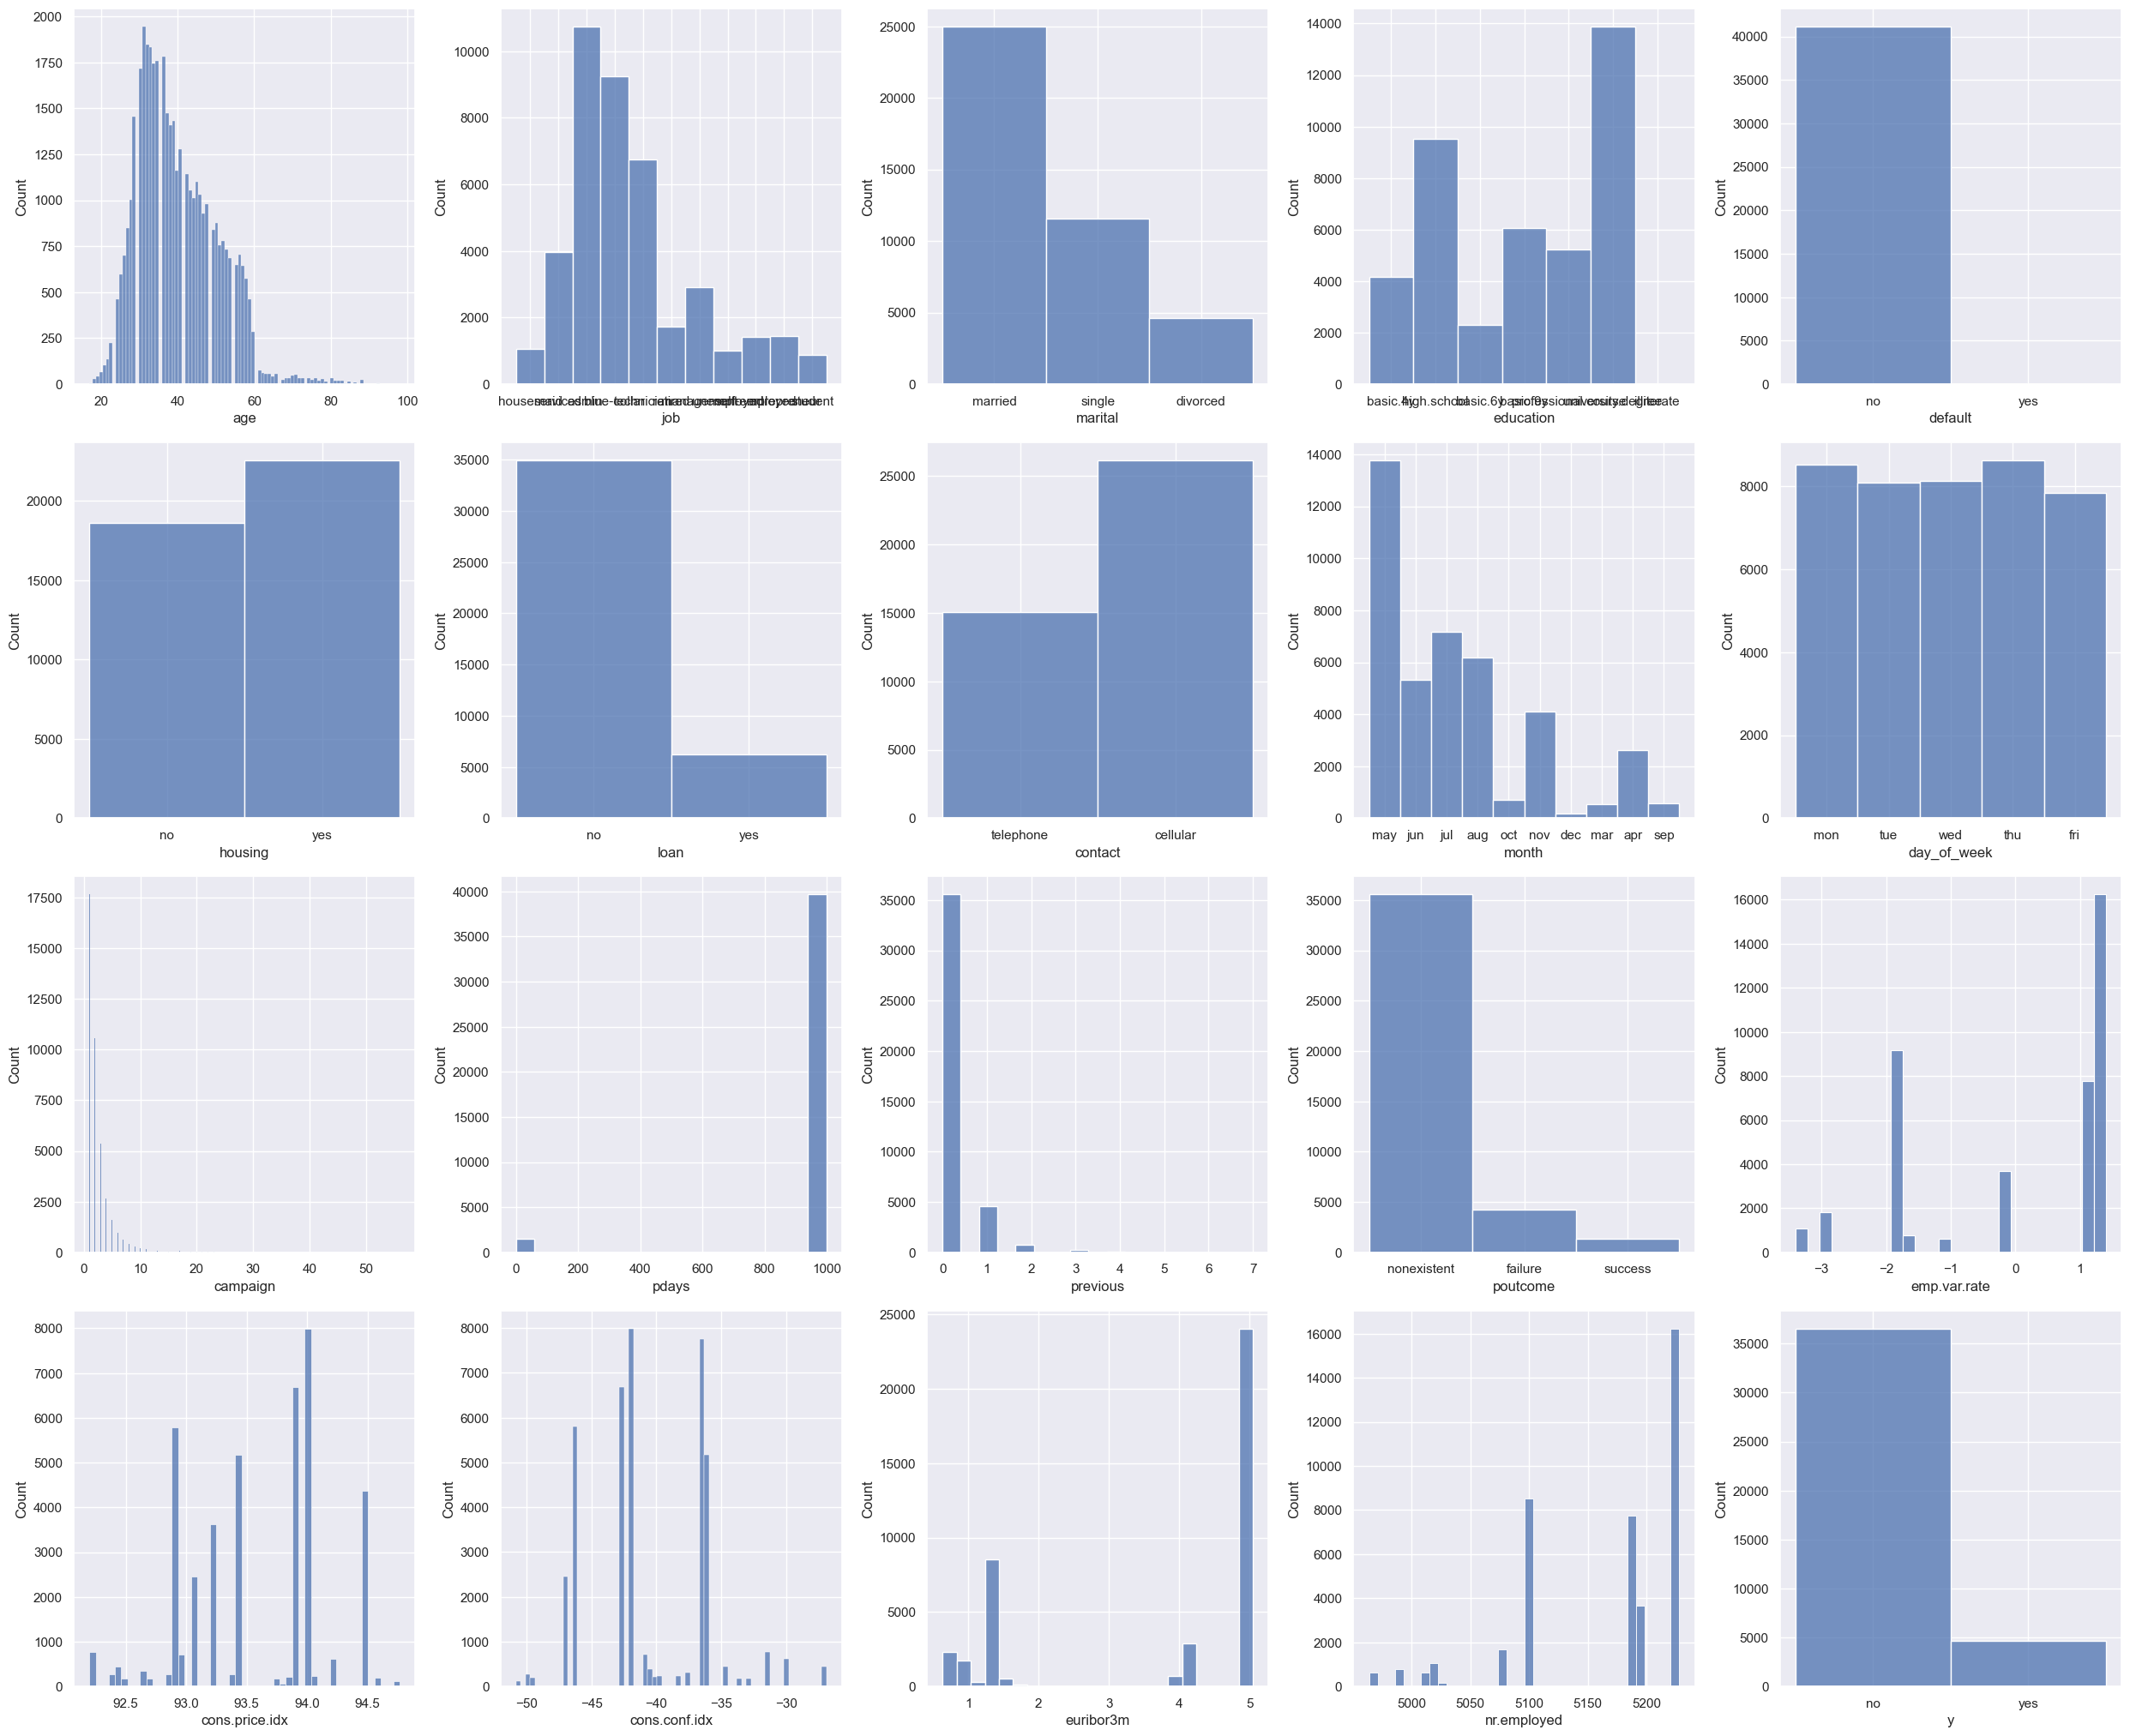

In [12]:
#Univariate analysis
plt.figure(figsize=(25,25))
plotnum=1
for column in data:
    plt.subplot(5,5,plotnum)
    sns.histplot(data[column])
    plotnum = plotnum+1
plt.tight_layout()
plt.show()

In [13]:
#Bivariate analysis
#analysing the input attributes with target output 'y'
#firstly seperating the numerical data and categorical data
data1 = data[['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']]
data2 = data[['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
#Here data1 is categorical and data2 is numerical

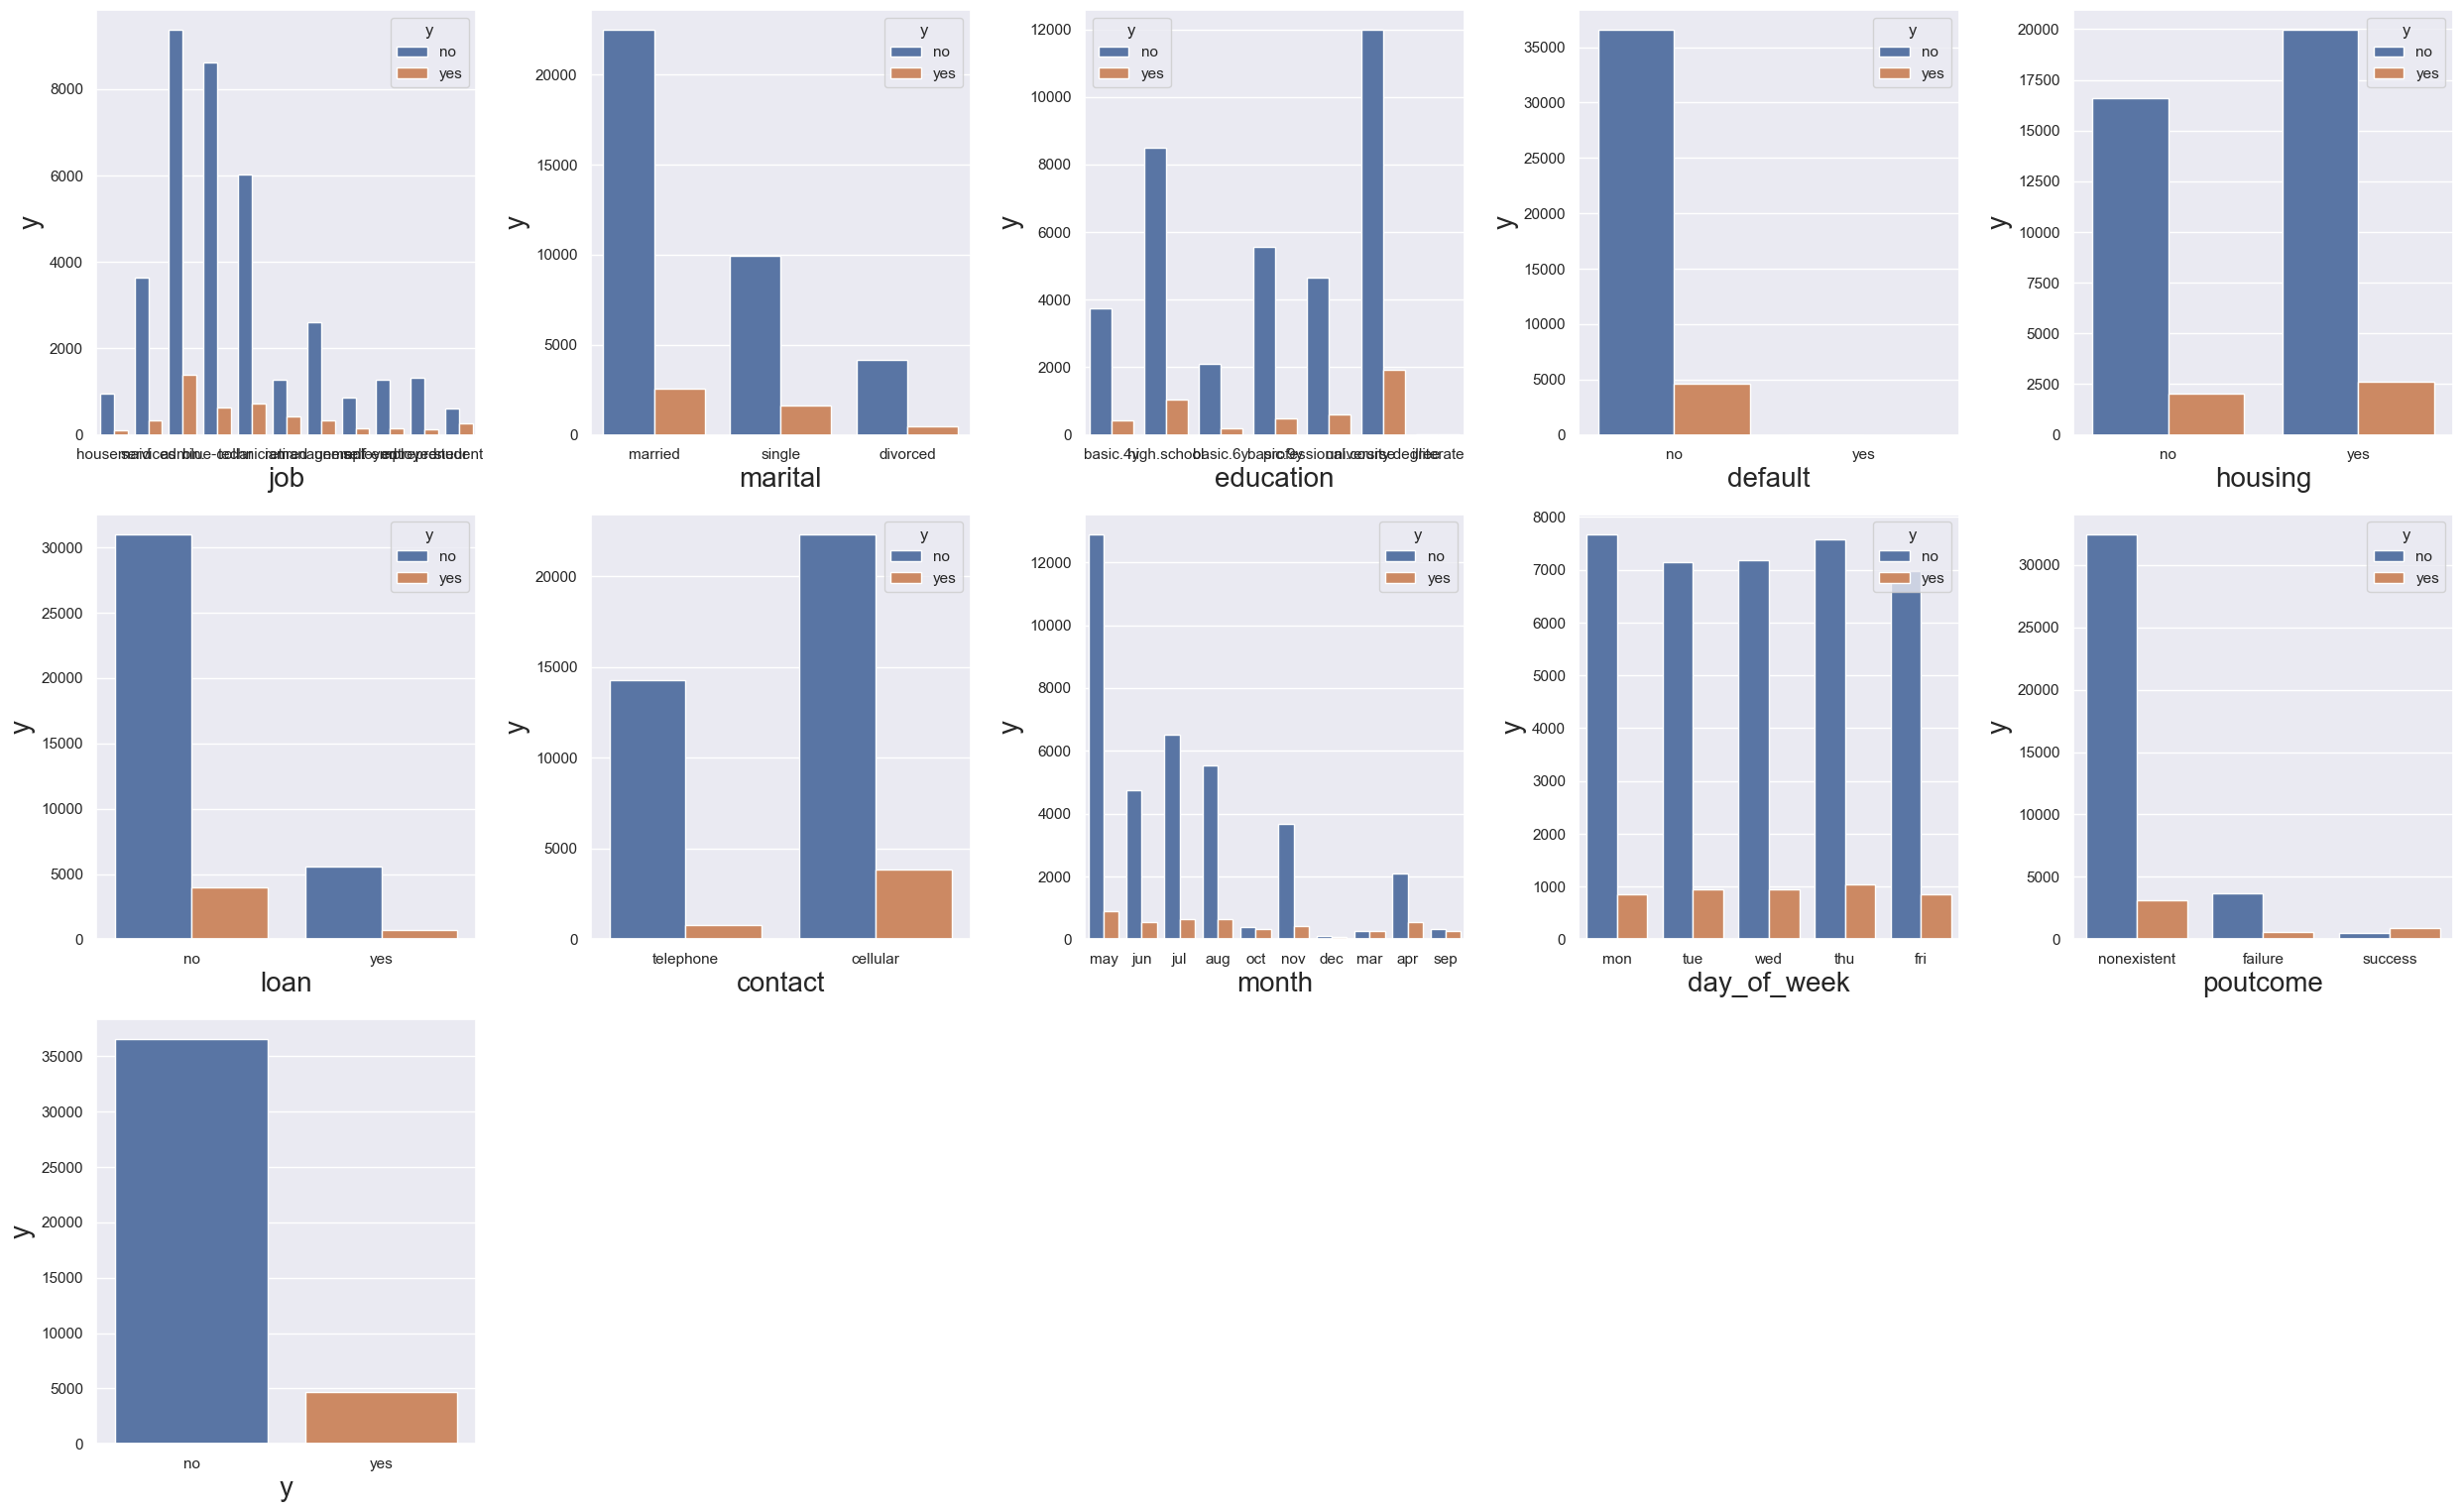

In [14]:
plt.figure(figsize=(25,25),facecolor='white') #To set canvas
plotnumber = 1 
for column in data1:
    if plotnumber<=25:   #here 25 is given based on number of columns and subplot siz
        ax=plt.subplot(5,5,plotnumber)
        sns.countplot(x=data1[column],hue=data['y'])
        plt.xlabel(column,fontsize=20) 
        plt.ylabel('y',fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

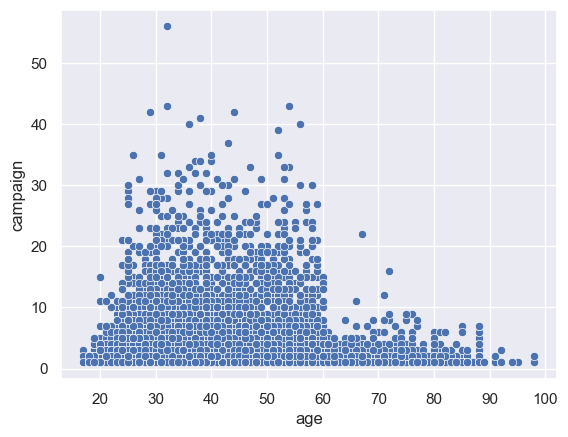

In [15]:
#Analyzing the relationships between input attributes
#age VS campaign
# we are analyzing to know is there a relationship b/w the client's age and number of contacts during the campaign
sns.scatterplot(x='age',y='campaign',data=data)
plt.show()

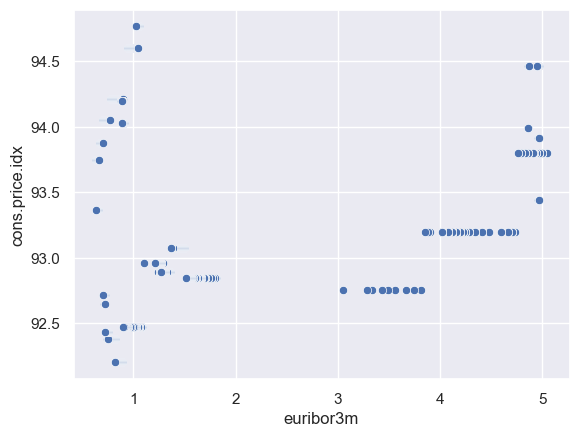

In [16]:
#euribor3m VS cons.price.idx
# we are analyzing to know how do interest rates (Euribor3m) relate to consumer prices (Cons.price.idx)
sns.scatterplot(x='euribor3m',y='cons.price.idx',data=data)
plt.show()

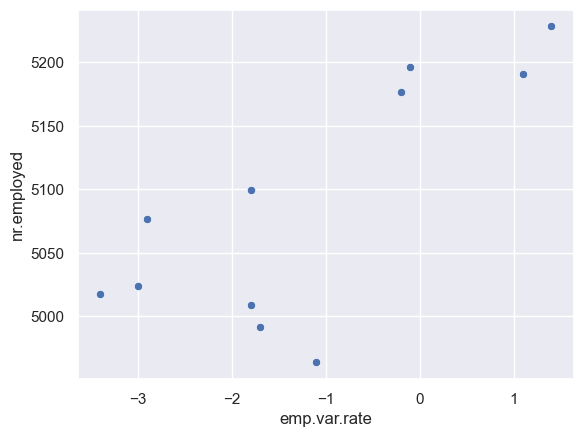

In [17]:
#empvarrate VS nr.employed
# we are analyzing to know is there a connection between employment variation rates and the number of employees
sns.scatterplot(x='emp.var.rate',y='nr.employed',data=data)
plt.show()

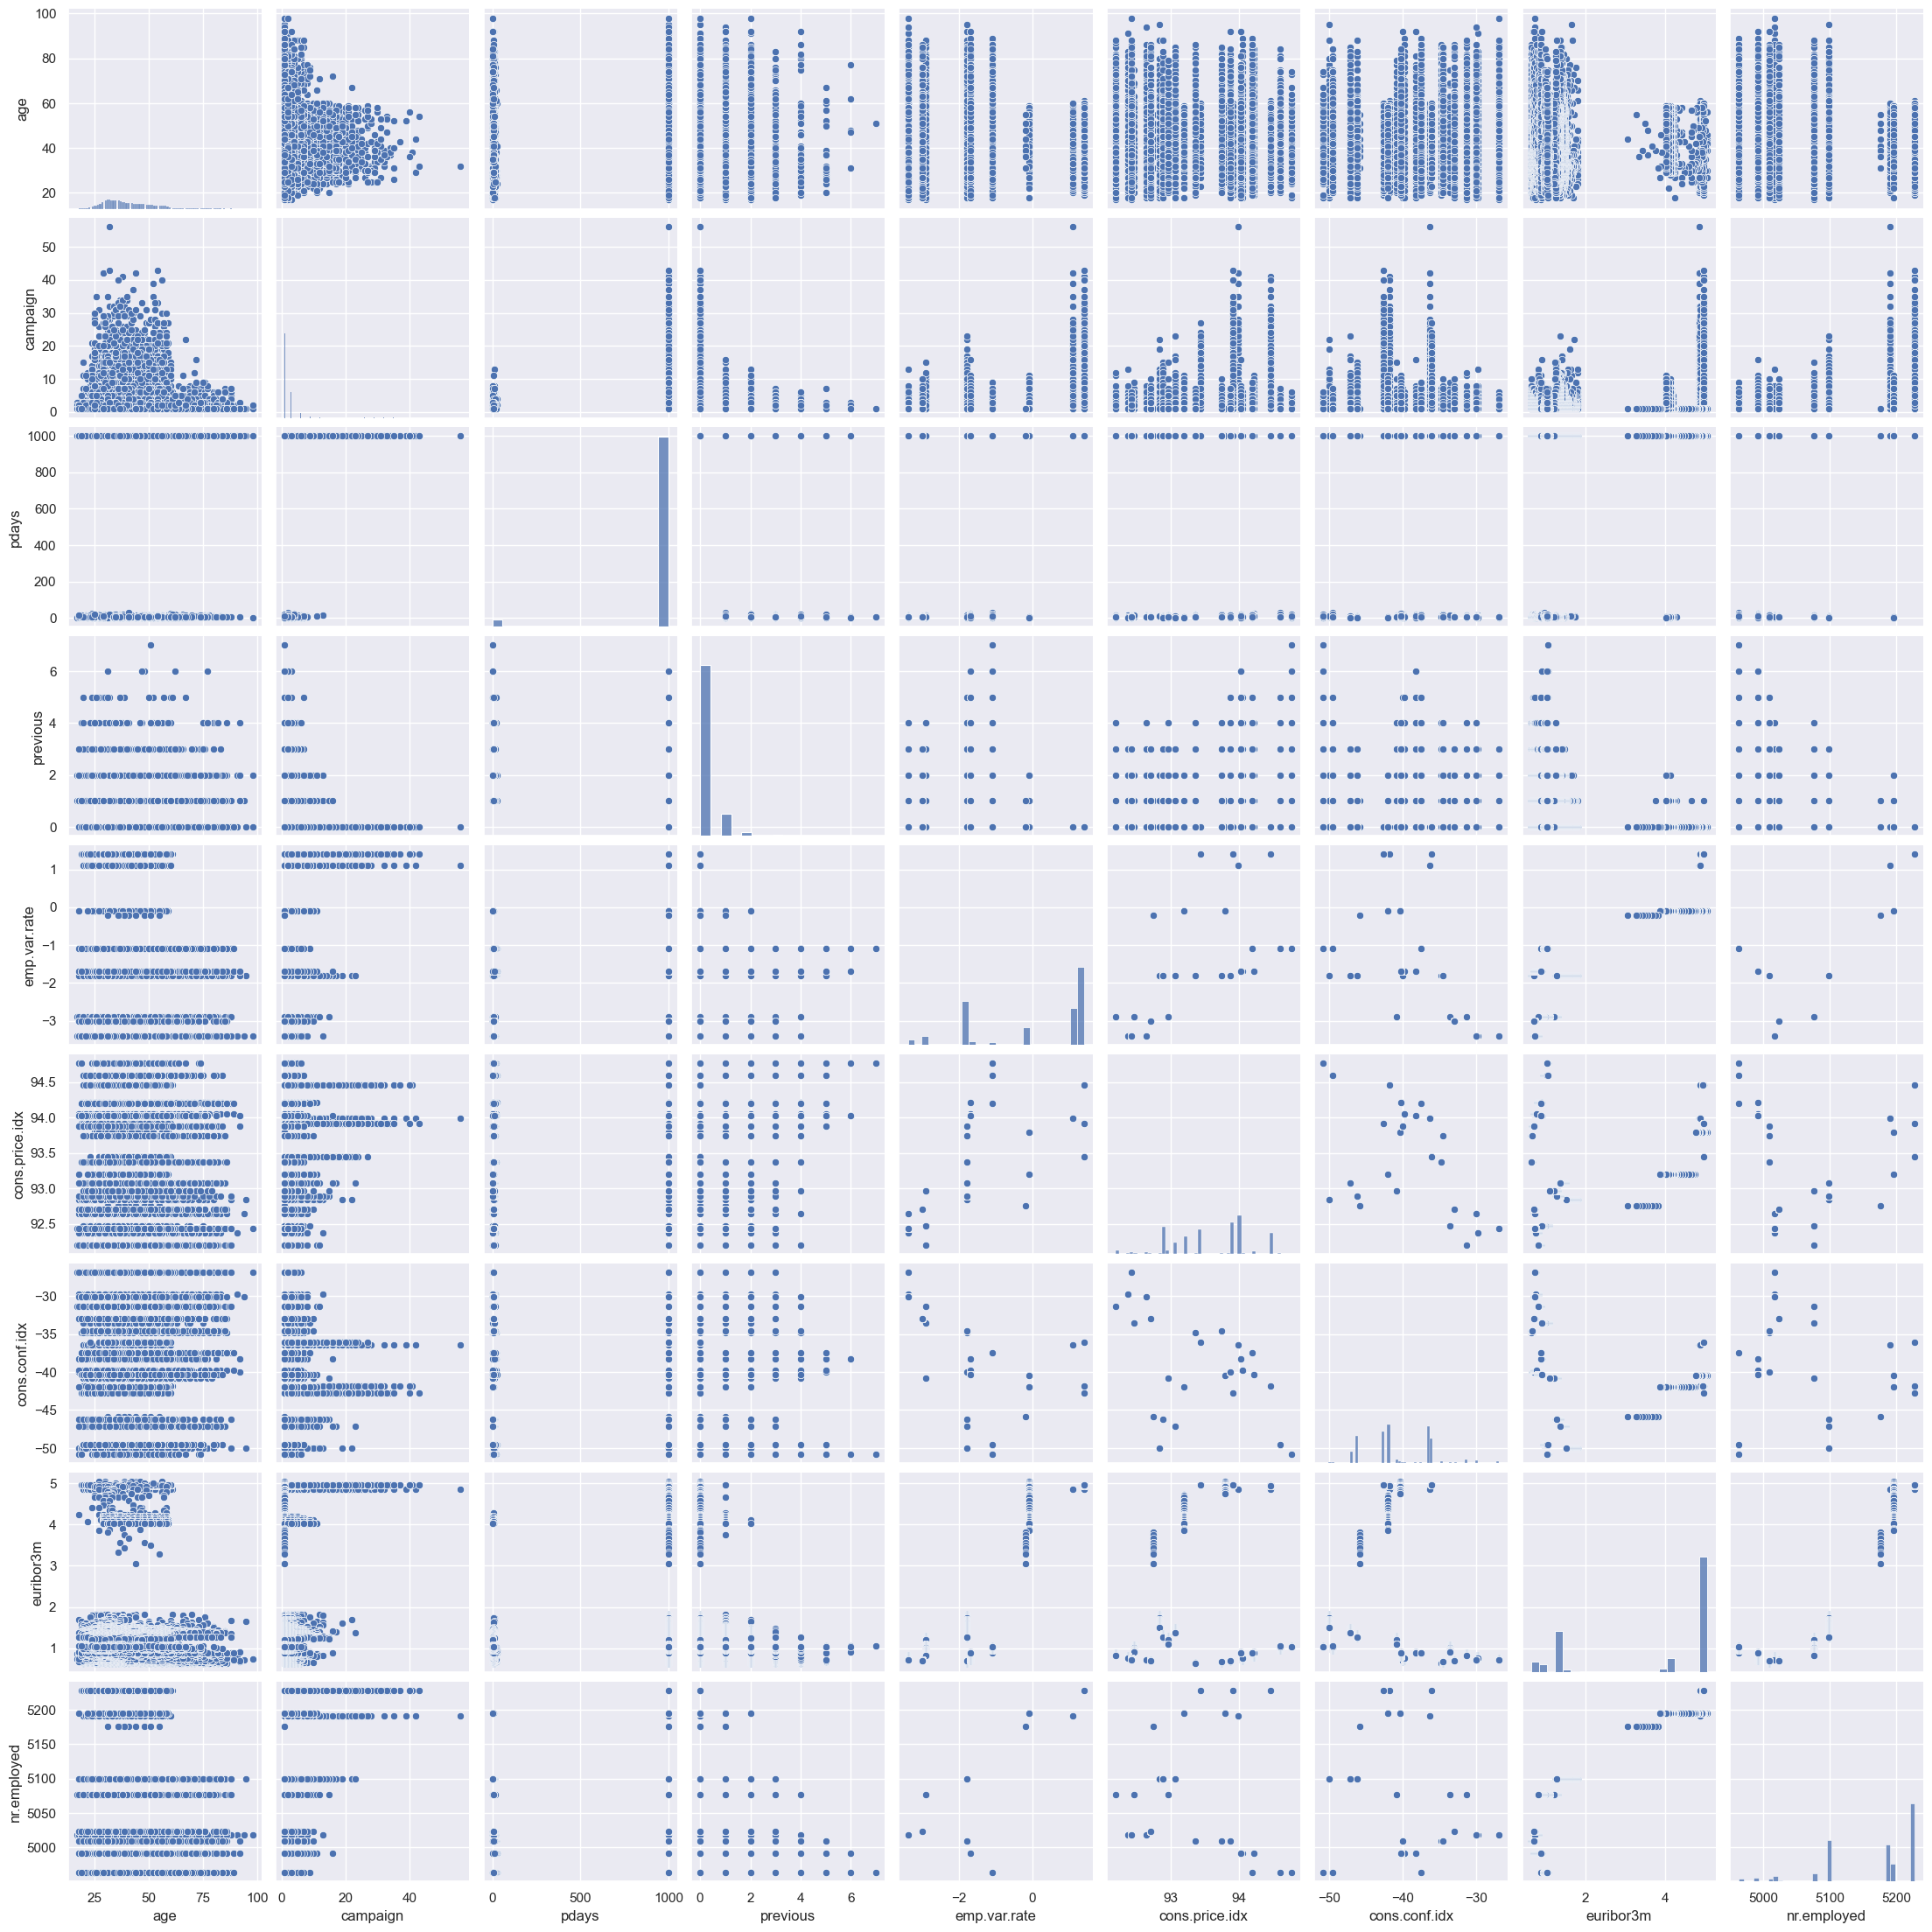

In [18]:
#Multii variate analysis
sns.pairplot(data=data)
plt.show()

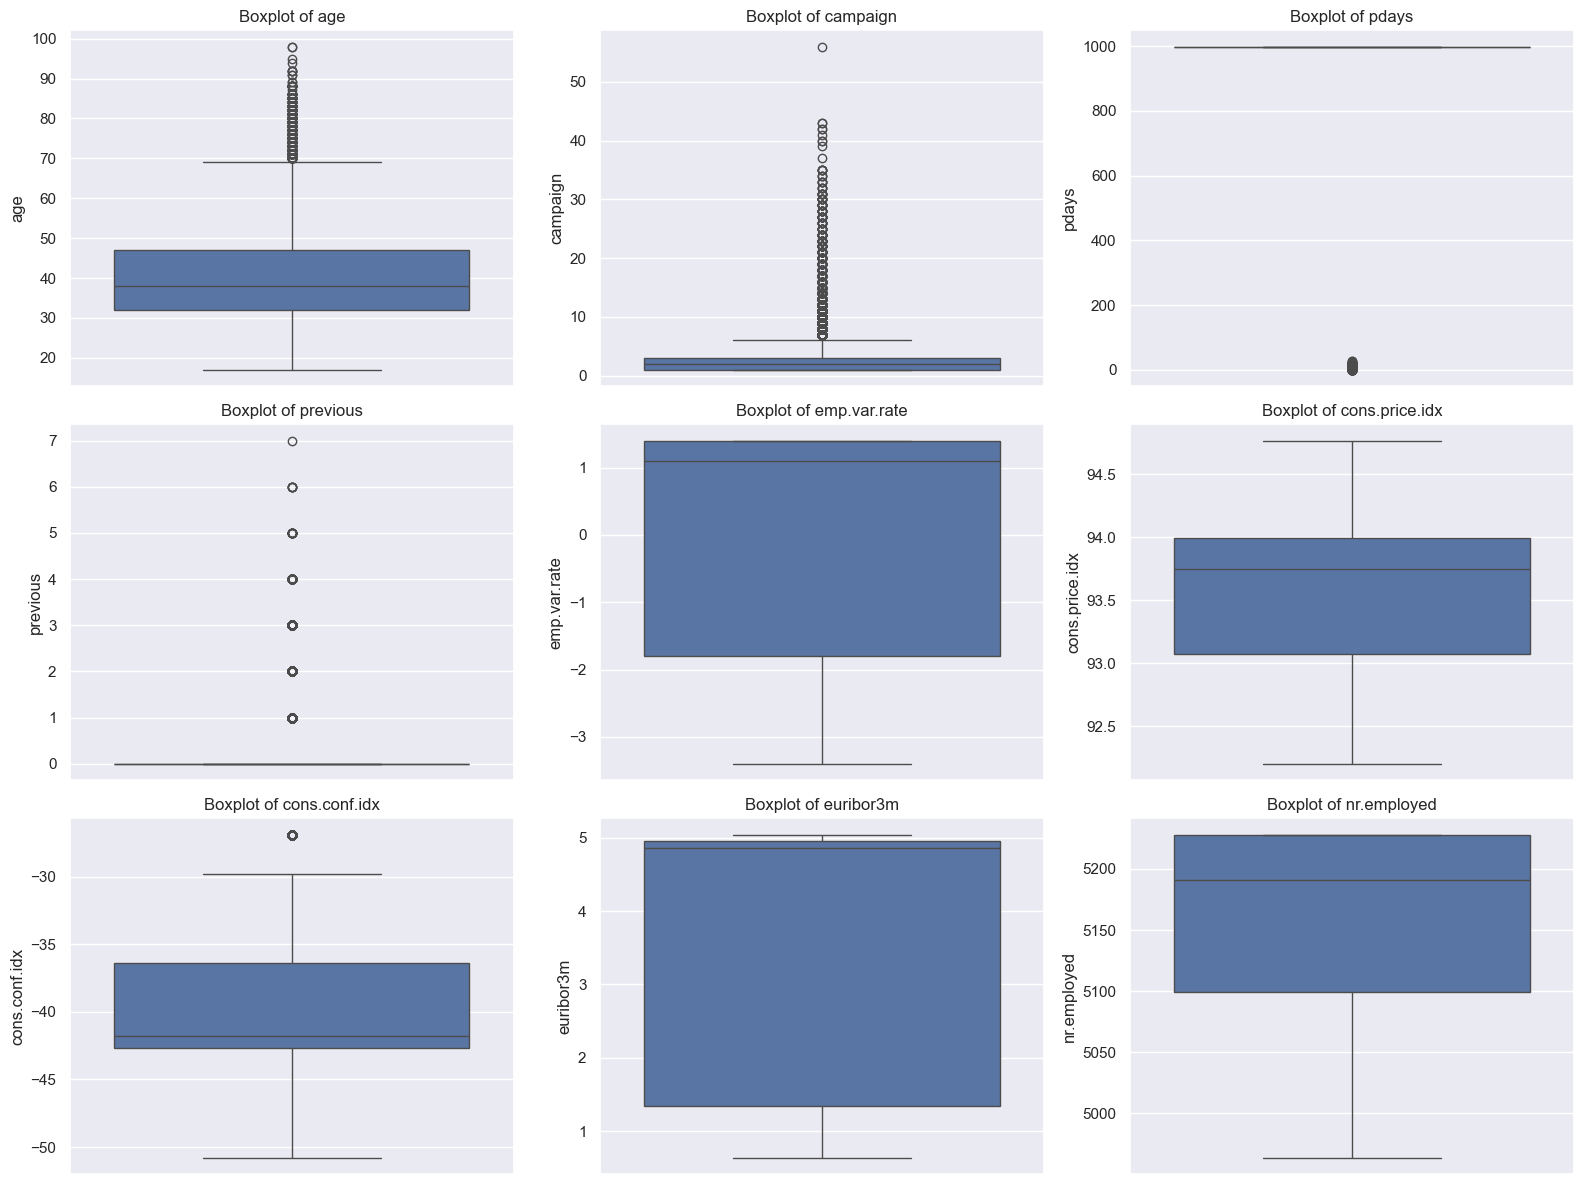

In [19]:
# Checking outliers for numerical columns
# Select only numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Set up the plot
plt.figure(figsize=(16, 12))

# Loop through numerical columns and plot each
for i, column in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols) + 2) // 3, 3, i)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()

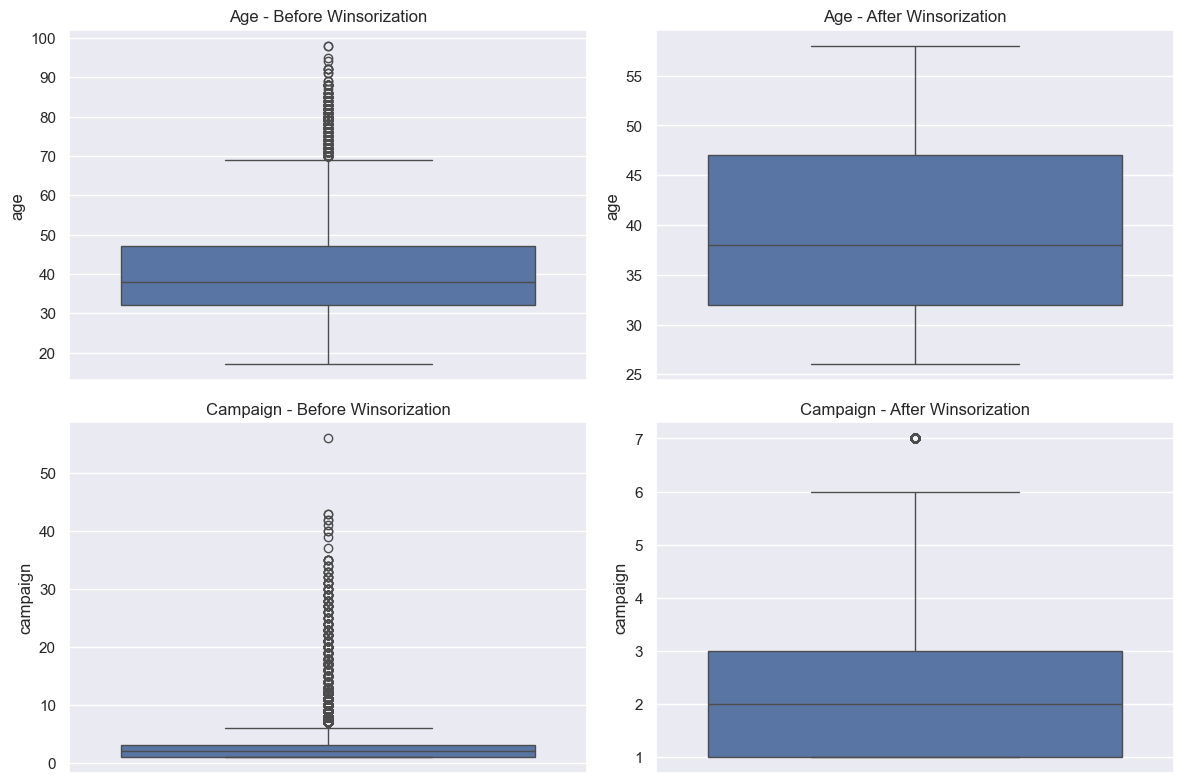

In [20]:
#Using Winsorize method to treat the outliers
!pip install scipy
from scipy.stats.mstats import winsorize
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create a copy of your original DataFrame
data_winsorized = data.copy()

# Step 2: Set the trimming limits (5% from both ends)
trim_limits = (0.05, 0.05)

# Step 3: Apply Winsorization
data_winsorized['age'] = winsorize(data['age'], limits=trim_limits)
data_winsorized['campaign'] = winsorize(data['campaign'], limits=trim_limits)

# Step 4: Plot Boxplots Before & After
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(y=data['age'])
plt.title('Age - Before Winsorization')

plt.subplot(2, 2, 2)
sns.boxplot(y=data_winsorized['age'])
plt.title('Age - After Winsorization')

plt.subplot(2, 2, 3)
sns.boxplot(y=data['campaign'])
plt.title('Campaign - Before Winsorization')

plt.subplot(2, 2, 4)
sns.boxplot(y=data_winsorized['campaign'])
plt.title('Campaign - After Winsorization')

plt.tight_layout()
plt.show()



In [21]:
data.rename(columns={
    'cons.price.idx': 'cons_price_idx',
    'cons.conf.idx': 'cons_conf_idx',
    'emp.var.rate': 'emp_var_rate',
    'nr.employed': 'nr_employed'
}, inplace=True)


In [22]:
#Dropping some features due to Multicollinearity because it reduces model interpretability and may lead to overfitting.
data = data.drop(['emp_var_rate', 'nr_employed'], axis=1)

In [23]:
data

age          job  marital            education default housing loan  \
0       56    housemaid  married             basic.4y      no      no   no   
1       57     services  married          high.school      no      no   no   
2       37     services  married          high.school      no     yes   no   
3       40       admin.  married             basic.6y      no      no   no   
4       56     services  married          high.school      no      no  yes   
...    ...          ...      ...                  ...     ...     ...  ...   
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

         contact month day_of_week  campaign  pdays  previous     poutcome  \
0      telephone   may         mon         1    999         0  nonexistent   
1      telephone   may         mon         1    999         0  nonexistent   
2      telephone   may         mon         1    999         0  nonexistent   
3      telephone   may         mon         1    999         0  nonexistent   
4      telephone   may         mon         1    999         0  nonexistent   
...          ...   ...         ...       ...    ...       ...          ...   
41183   cellular   nov         fri         1    999         0  nonexistent   
41184   cellular   nov         fri         1    999         0  nonexistent   
41185   cellular   nov         fri         2    999         0  nonexistent   
41186   cellular   nov         fri         1    999         0  nonexistent   
41187   cellular   nov         fri         3    999         1      failure   

       cons_price_idx  cons_conf_idx  euribor3m    y  
0              93.994          -36.4      4.857   no  
1              93.994          -36.4      4.857   no  
2              93.994          -36.4      4.857   no  
3              93.994          -36.4      4.857   no  
4              93.994          -36.4      4.857   no  
...               ...            ...        ...  ...  
41183          94.767          -50.8      1.028  yes  
41184          94.767          -50.8      1.028   no  
41185          94.767          -50.8      1.028   no  
41186          94.767          -50.8      1.028  yes  
41187          94.767          -50.8      1.028   no  

[41188 rows x 18 columns]

## Feature Engineering 

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from category_encoders import BinaryEncoder
import pickle
from sklearn.pipeline import Pipeline

In [25]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [26]:
#Applying MinMax Scaler to pdays and previous
# Scale 'pdays' and 'previous'
data[['pdays', 'previous']] = sc.fit_transform(data[['pdays', 'previous']])
# Verify transformation
print(data[['pdays', 'previous']].head())

   pdays  previous
0    1.0       0.0
1    1.0       0.0
2    1.0       0.0
3    1.0       0.0
4    1.0       0.0


In [27]:
data.day_of_week.unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [28]:
data.day_of_week.value_counts()

day_of_week
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: count, dtype: int64

In [29]:
#The columns are given to the encoders and scalers accordingly
OHE_columns = ['marital', 'poutcome', 'contact']
standard_scaler = ['age', 'campaign', 'pdays', 'previous', 'cons_price_idx', 'cons_conf_idx', 'euribor3m']
label_encoder = ['education']
binary_encoder = ['default', 'housing', 'loan']
ordinal_encoder = ['month']
frequency_encoder = ['job','day_of_week']
passthrough = []  # No passthrough columns

In [30]:
#code to do label encoding
class ModifiedLabelEncoder(LabelEncoder):
    def fit_transform(self, y, *args, **kwargs):
        return super().fit_transform(y).reshape(-1, 1)
    def transform(self, y, *args, **kwargs):
        return super().transform(y).reshape(-1, 1)

In [31]:
#code to do binary encoding
def binary_encode(x):
    binary_mapping = {'yes': 1, 'no': 0}
    return x.replace(binary_mapping)
binary_encoder_transformer = FunctionTransformer(binary_encode)

In [32]:
class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column
        self.mapping = {}
    def fit(self, X, y=None):
        # Calculate frequency encoding mapping for the column
        value_counts = X[self.column].value_counts()
        sorted_values = sorted(value_counts.items(), key=lambda x: x[1])
        self.mapping = {value: idx for idx, (value, _) in enumerate(sorted_values)}
        return self
    def transform(self, X):
        # Apply frequency encoding based on the fitted mapping
        X_encoded = X.copy()
        X_encoded[self.column] = X_encoded[self.column].map(self.mapping)
        return X_encoded

In [33]:
data

age          job  marital            education default housing loan  \
0       56    housemaid  married             basic.4y      no      no   no   
1       57     services  married          high.school      no      no   no   
2       37     services  married          high.school      no     yes   no   
3       40       admin.  married             basic.6y      no      no   no   
4       56     services  married          high.school      no      no  yes   
...    ...          ...      ...                  ...     ...     ...  ...   
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

         contact month day_of_week  campaign  pdays  previous     poutcome  \
0      telephone   may         mon         1    1.0  0.000000  nonexistent   
1      telephone   may         mon         1    1.0  0.000000  nonexistent   
2      telephone   may         mon         1    1.0  0.000000  nonexistent   
3      telephone   may         mon         1    1.0  0.000000  nonexistent   
4      telephone   may         mon         1    1.0  0.000000  nonexistent   
...          ...   ...         ...       ...    ...       ...          ...   
41183   cellular   nov         fri         1    1.0  0.000000  nonexistent   
41184   cellular   nov         fri         1    1.0  0.000000  nonexistent   
41185   cellular   nov         fri         2    1.0  0.000000  nonexistent   
41186   cellular   nov         fri         1    1.0  0.000000  nonexistent   
41187   cellular   nov         fri         3    1.0  0.142857      failure   

       cons_price_idx  cons_conf_idx  euribor3m    y  
0              93.994          -36.4      4.857   no  
1              93.994          -36.4      4.857   no  
2              93.994          -36.4      4.857   no  
3              93.994          -36.4      4.857   no  
4              93.994          -36.4      4.857   no  
...               ...            ...        ...  ...  
41183          94.767          -50.8      1.028  yes  
41184          94.767          -50.8      1.028   no  
41185          94.767          -50.8      1.028   no  
41186          94.767          -50.8      1.028  yes  
41187          94.767          -50.8      1.028   no  

[41188 rows x 18 columns]

In [34]:
# Define transformers
binary_encoder_transformer = FunctionTransformer(binary_encode)  # Binary encode 'yes'/'no'
ordinal_encoder_transformer = OrdinalEncoder(categories=[['may', 'jul', 'aug', 'jun', 'nov', 'apr', 'oct', 'sep', 'mar', 'dec']])

In [35]:
# Updated ColumnTransformer with MinMaxScaler for 'pdays'
preprocessor = ColumnTransformer([
    ("OHE_columns", OneHotEncoder(sparse_output=False, handle_unknown='ignore'), OHE_columns),
    ("Ordinal_encoder_label", OrdinalEncoder(), label_encoder),
    ("Binary_encoder", OrdinalEncoder(), binary_encoder),
    ("Ordinal_encoder_month", OrdinalEncoder(), ordinal_encoder),
    ("Standard_scaler", MinMaxScaler(), standard_scaler)  # MinMaxScaler applied to pdays
])

In [36]:
from sklearn.preprocessing import OneHotEncoder

OHE = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer([
    ("OHE_columns", OHE, OHE_columns),
    ("Ordinal_encoder_label", ModifiedLabelEncoder(), label_encoder),
    ("Binary_encoder", binary_encoder_transformer, binary_encoder),
    ("Ordinal_encoder_month", OrdinalEncoder(), ordinal_encoder),
    ("Standard_scaler", MinMaxScaler(), standard_scaler),
    ("Frequency_encoder_job", FrequencyEncoder(column='job'), ['job']),
    ("Frequency_encoder_day_of_week", FrequencyEncoder(column='day_of_week'), ['day_of_week'])
])


In [37]:
"""# Define ColumnTransformer
preprocessor = ColumnTransformer([
    ("OHE_columns", OneHotEncoder(sparse_output=False, handle_unknown='ignore'), OHE_columns),
    ("Ordinal_encoder_label", OrdinalEncoder(), label_encoder),
    ("Binary_encoder", binary_encoder_transformer, binary_encoder),
    ("Ordinal_encoder_month", ordinal_encoder_transformer, ordinal_encoder),
    ("Standard_scaler", StandardScaler(), standard_scaler)
])"""
# Fit and transform the data
transformed_data = preprocessor.fit_transform(data)
# Print transformed data
print("Transformed data shape:", transformed_data.shape)
print("Preview of transformed data:")
print(transformed_data[:5])

Transformed data shape: (41188, 22)
Preview of transformed data:
[[0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0 0 0 0 6.0 0.48148148148148145 0.0 1.0
  0.0 0.6987529228371017 0.6025104602510458 0.9573792790750397 2 3]
 [0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 3 0 0 0 6.0 0.4938271604938272 0.0 1.0
  0.0 0.6987529228371017 0.6025104602510458 0.9573792790750397 7 3]
 [0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 3 0 1 0 6.0 0.24691358024691357 0.0 1.0
  0.0 0.6987529228371017 0.6025104602510458 0.9573792790750397 7 3]
 [0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 1 0 0 0 6.0 0.2839506172839506 0.0 1.0
  0.0 0.6987529228371017 0.6025104602510458 0.9573792790750397 10 3]
 [0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 3 0 0 1 6.0 0.48148148148148145 0.0 1.0
  0.0 0.6987529228371017 0.6025104602510458 0.9573792790750397 7 3]]


In [38]:
preprocessor

ColumnTransformer(transformers=[('OHE_columns',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['marital', 'poutcome', 'contact']),
                                ('Ordinal_encoder_label',
                                 ModifiedLabelEncoder(), ['education']),
                                ('Binary_encoder',
                                 FunctionTransformer(func=<function binary_encode at 0x000002DDECE79760>),
                                 ['default', 'housing', 'loan']),
                                ('Ordinal_encoder_month', OrdinalEncoder(),
                                 ['month']),
                                ('Standard_scaler', MinMaxScaler(),
                                 ['age', 'campaign', 'pdays', 'previous',
                                  'cons_price_idx', 'cons_conf_idx',
                                  'euribor3m']),
                                ('Frequency_encoder_job',
                                 FrequencyEncoder(column='job'), ['job']),
                                ('Frequency_encoder_day_of_week',
                                 FrequencyEncoder(column='day_of_week'),
                                 ['day_of_week'])])

In [39]:
# Fit and transform the data using the preprocessor
transformed_data = preprocessor.fit_transform(data)
# Print the transformed data
print(transformed_data)

[[0.0 1.0 0.0 ... 0.9573792790750397 2 3]
 [0.0 1.0 0.0 ... 0.9573792790750397 7 3]
 [0.0 1.0 0.0 ... 0.9573792790750397 7 3]
 ...
 [0.0 1.0 0.0 ... 0.08932214917252326 5 0]
 [0.0 1.0 0.0 ... 0.08932214917252326 8 0]
 [0.0 1.0 0.0 ... 0.08932214917252326 5 0]]


In [40]:
for name, transformer, columns in preprocessor.transformers_:
    print(f"Transformer: {name}, Columns: {columns}")

Transformer: OHE_columns, Columns: ['marital', 'poutcome', 'contact']
Transformer: Ordinal_encoder_label, Columns: ['education']
Transformer: Binary_encoder, Columns: ['default', 'housing', 'loan']
Transformer: Ordinal_encoder_month, Columns: ['month']
Transformer: Standard_scaler, Columns: ['age', 'campaign', 'pdays', 'previous', 'cons_price_idx', 'cons_conf_idx', 'euribor3m']
Transformer: Frequency_encoder_job, Columns: ['job']
Transformer: Frequency_encoder_day_of_week, Columns: ['day_of_week']
Transformer: remainder, Columns: [17]


In [41]:
# Print a preview of the transformed data
print("Preview of transformed data:")
print(transformed_data[:5])  # Show first 5 rows
# Check data type of transformed_data
if isinstance(transformed_data, np.ndarray):
    print("Data is encoded: Transformed data is a NumPy array.")
else:
    print("Data is not properly encoded.")
# Verify specific transformations
for name, transformer, columns in preprocessor.transformers_:
    print(f"Transformer: {name}, Applied on Columns: {columns}")

Preview of transformed data:
[[0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0 0 0 0 6.0 0.48148148148148145 0.0 1.0
  0.0 0.6987529228371017 0.6025104602510458 0.9573792790750397 2 3]
 [0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 3 0 0 0 6.0 0.4938271604938272 0.0 1.0
  0.0 0.6987529228371017 0.6025104602510458 0.9573792790750397 7 3]
 [0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 3 0 1 0 6.0 0.24691358024691357 0.0 1.0
  0.0 0.6987529228371017 0.6025104602510458 0.9573792790750397 7 3]
 [0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 1 0 0 0 6.0 0.2839506172839506 0.0 1.0
  0.0 0.6987529228371017 0.6025104602510458 0.9573792790750397 10 3]
 [0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 3 0 0 1 6.0 0.48148148148148145 0.0 1.0
  0.0 0.6987529228371017 0.6025104602510458 0.9573792790750397 7 3]]
Data is encoded: Transformed data is a NumPy array.
Transformer: OHE_columns, Applied on Columns: ['marital', 'poutcome', 'contact']
Transformer: Ordinal_encoder_label, Applied on Columns: ['education']
Transformer: Binary_encoder, Applied on Columns: ['default

In [42]:
from preprocessor import (
    ModifiedLabelEncoder,
    binary_encoder_transformer,
    FrequencyEncoder
)


In [43]:
import pickle   # For saving and loading machine learning models
from sklearn.model_selection import train_test_split  # For splitting the data into training and testing
from preprocessor import *  # To import all preprocessor functions at once
from imblearn.over_sampling import SMOTE  # For balancing the data
import warnings

In [44]:
#checking the skewness so that we can apply for transformations
from scipy.stats import skew
numerical_columns = ['age', 'campaign', 'pdays', 'previous', 
                      'cons_price_idx', 'cons_conf_idx', 
                     'euribor3m']
for col in numerical_columns:
    print(f"{col}: Skewness = {skew(data[col], nan_policy='omit')}")

age: Skewness = 0.7846682380932289
campaign: Skewness = 4.762333252560971
pdays: Skewness = -4.922010656450042
previous: Skewness = 3.8319026847007036
cons_price_idx: Skewness = -0.23087924271991117
cons_conf_idx: Skewness = 0.3031688173189229
euribor3m: Skewness = -0.7091621286441162


In [45]:
# Check for missing values to see pdays is handled or not due to '999'
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
y                 0
dtype: int64

In [46]:
data.pdays.value_counts()

pdays
1.000000    39673
0.003003      439
0.006006      412
0.004004      118
0.009009       64
0.002002       61
0.007007       60
0.012012       58
0.010010       52
0.005005       46
0.013013       36
0.011011       28
0.001001       26
0.015015       24
0.014014       20
0.008008       18
0.000000       15
0.016016       11
0.017017        8
0.018018        7
0.022022        3
0.019019        3
0.021021        2
0.025025        1
0.026026        1
0.027027        1
0.020020        1
Name: count, dtype: int64

In [47]:
print(data['y'].unique())

['no' 'yes']


In [48]:
# Convert 'yes'/'no' to 1/0
data['y'] = data['y'].map({'yes': 1, 'no': 0})

In [49]:
#verifying the conversion
print(data['y'].unique())

[0 1]


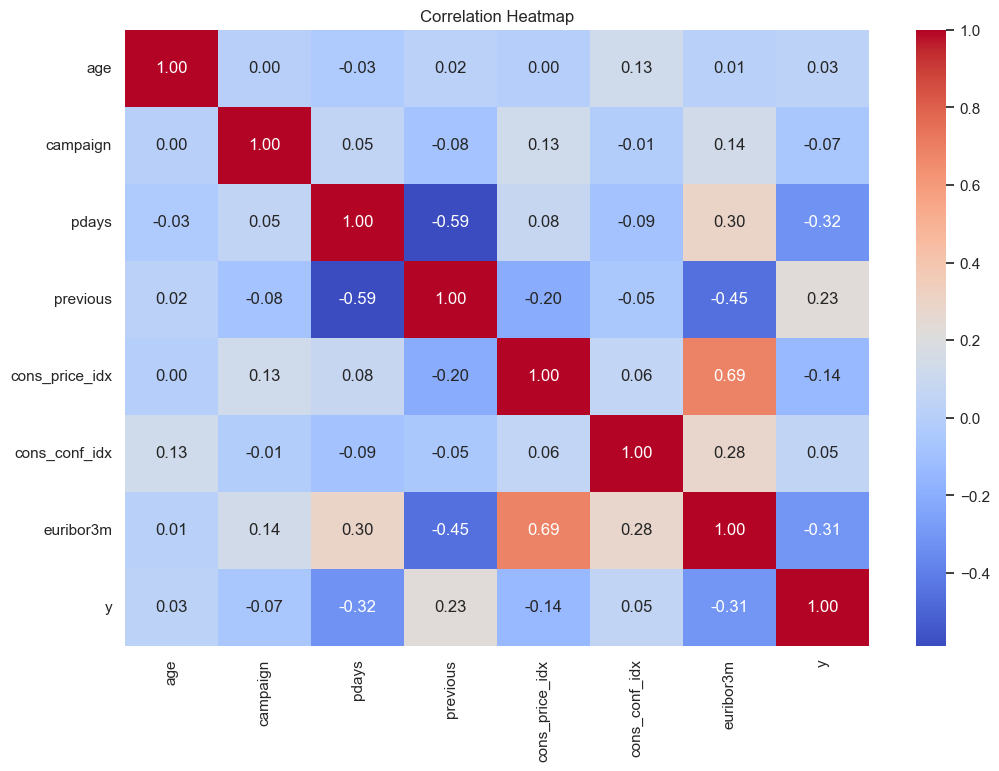

In [50]:
# Select numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])
# Calculate the correlation matrix
corr_matrix = numerical_data.corr()
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [51]:
#Find Correlations with the Target
target_corr = corr_matrix['y'].sort_values(ascending=False)
print("Correlations with target variable 'y':")
print(target_corr)

Correlations with target variable 'y':
y                 1.000000
previous          0.230181
cons_conf_idx     0.054878
age               0.030399
campaign         -0.066357
cons_price_idx   -0.136211
euribor3m        -0.307771
pdays            -0.324914
Name: y, dtype: float64


In [52]:
# Find pairs with correlation > 0.8
high_corr = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr >= 0.8]  # Threshold for strong correlation
print("Highly correlated feature pairs:")
print(high_corr)

Highly correlated feature pairs:
age             age               1.0
campaign        campaign          1.0
euribor3m       euribor3m         1.0
cons_conf_idx   cons_conf_idx     1.0
cons_price_idx  cons_price_idx    1.0
previous        previous          1.0
pdays           pdays             1.0
y               y                 1.0
dtype: float64


In [53]:
data

age          job  marital            education default housing loan  \
0       56    housemaid  married             basic.4y      no      no   no   
1       57     services  married          high.school      no      no   no   
2       37     services  married          high.school      no     yes   no   
3       40       admin.  married             basic.6y      no      no   no   
4       56     services  married          high.school      no      no  yes   
...    ...          ...      ...                  ...     ...     ...  ...   
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

         contact month day_of_week  campaign  pdays  previous     poutcome  \
0      telephone   may         mon         1    1.0  0.000000  nonexistent   
1      telephone   may         mon         1    1.0  0.000000  nonexistent   
2      telephone   may         mon         1    1.0  0.000000  nonexistent   
3      telephone   may         mon         1    1.0  0.000000  nonexistent   
4      telephone   may         mon         1    1.0  0.000000  nonexistent   
...          ...   ...         ...       ...    ...       ...          ...   
41183   cellular   nov         fri         1    1.0  0.000000  nonexistent   
41184   cellular   nov         fri         1    1.0  0.000000  nonexistent   
41185   cellular   nov         fri         2    1.0  0.000000  nonexistent   
41186   cellular   nov         fri         1    1.0  0.000000  nonexistent   
41187   cellular   nov         fri         3    1.0  0.142857      failure   

       cons_price_idx  cons_conf_idx  euribor3m  y  
0              93.994          -36.4      4.857  0  
1              93.994          -36.4      4.857  0  
2              93.994          -36.4      4.857  0  
3              93.994          -36.4      4.857  0  
4              93.994          -36.4      4.857  0  
...               ...            ...        ... ..  
41183          94.767          -50.8      1.028  1  
41184          94.767          -50.8      1.028  0  
41185          94.767          -50.8      1.028  0  
41186          94.767          -50.8      1.028  1  
41187          94.767          -50.8      1.028  0  

[41188 rows x 18 columns]

# Task 2:-Create a predictive model which will help the bank marketing team to know which customer will buy the product.


In [54]:
# Final feature set
X = data.drop('y', axis=1)  # Features
y = data['y']  # Target

In [55]:
# Spliting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=33)

In [56]:
print(x_train.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'cons_price_idx', 'cons_conf_idx', 'euribor3m'],
      dtype='object')


In [57]:
# Transform the training data using the preprocessor object or PipeLine
processed_x_train = preprocessor.fit_transform(x_train)
processed_x_test = preprocessor.fit_transform(x_test)

In [58]:
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(class_weight={0:1,1:5},y=y_train)  # You need to define this function
# based on weights the inputs are given preference, hightest weight hightest preference
# while in y=mx+c
# m represents slope where as here we consider it as weight
# smote technique can also be used
# the ratios may differ

In [59]:
!pip install xgboost


In [60]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_sample_weight

### 1. Logistic Regression 

In [61]:
from sklearn.model_selection import GridSearchCV
log_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']  # Optimization algorithms
}

log_grid = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=42), 
                        log_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

log_grid.fit(processed_x_train, y_train)

print("Best Parameters for Logistic Regression:", log_grid.best_params_)

# Train final Logistic Regression model
best_log_model = LogisticRegression(**log_grid.best_params_, class_weight='balanced', random_state=42)
best_log_model.fit(processed_x_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for Logistic Regression: {'C': 10, 'solver': 'lbfgs'}


LogisticRegression(C=10, class_weight='balanced', random_state=42)

In [62]:
# Train Logistic Regression with Best Parameters
best_log_model = LogisticRegression(C=100, solver='lbfgs', class_weight='balanced', random_state=42)
best_log_model.fit(processed_x_train, y_train)

LogisticRegression(C=100, class_weight='balanced', random_state=42)

In [63]:
y_predict = best_log_model.predict(processed_x_test)

In [64]:
y_predict

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

🔹 Logistic Regression Accuracy: 0.7655627852772652

🔹 Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.78      0.85      9132
           1       0.28      0.67      0.39      1165

    accuracy                           0.77     10297
   macro avg       0.61      0.72      0.62     10297
weighted avg       0.87      0.77      0.80     10297



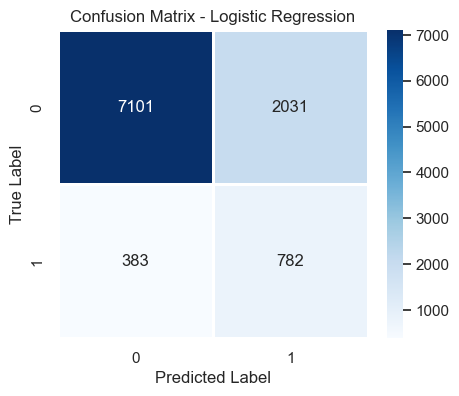

In [65]:
# Now, Evaluate Model Performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# ✅ Calculate Accuracy
log_accuracy = accuracy_score(y_test, y_predict)
print("🔹 Logistic Regression Accuracy:", log_accuracy)
# ✅ Print Classification Report
print("\n🔹 Classification Report for Logistic Regression:")
print(classification_report(y_test, y_predict))
# ✅ Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='d', cmap='Blues', linewidths=1)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

### 2. Decision Tree

In [66]:
# Define Hyperparameters for Decision Tree
dt_param_grid = {
    'max_depth': [3, 5, 10, None],
    'criterion': ['gini', 'entropy']
}
# Train Decision Tree with GridSearchCV
dt_grid = GridSearchCV(DecisionTreeClassifier(class_weight='balanced', random_state=42),
                       dt_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
dt_grid.fit(processed_x_train, y_train)
print("Best Parameters for Decision Tree:", dt_grid.best_params_)
# Train Final Decision Tree Model
best_dt_model = DecisionTreeClassifier(**dt_grid.best_params_, class_weight='balanced', random_state=42)
best_dt_model.fit(processed_x_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None}


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=42)

In [67]:
# Predict
y_pred_dt = best_dt_model.predict(processed_x_test)
y_pred_dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

🔹 Decision Tree Accuracy: 0.8452947460425366

🔹 Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      9132
           1       0.31      0.31      0.31      1165

    accuracy                           0.85     10297
   macro avg       0.61      0.61      0.61     10297
weighted avg       0.84      0.85      0.84     10297



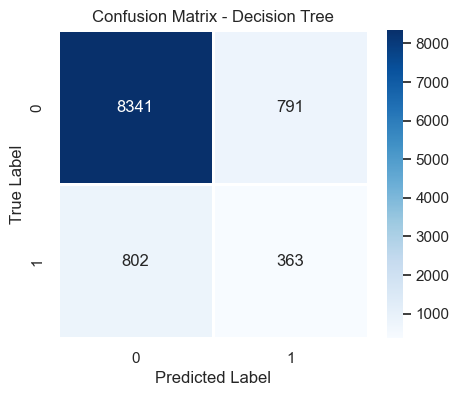

In [68]:
# Evaluate Decision Tree
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("🔹 Decision Tree Accuracy:", dt_accuracy)
print("\n🔹 Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues', linewidths=1)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

### 3. Random Forest

In [ ]:
# Define Hyperparameters for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}
# Train Random Forest with GridSearchCV
rf_grid = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42),
                       rf_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
rf_grid.fit(processed_x_train, y_train)
print("Best Parameters for Random Forest:", rf_grid.best_params_)
# Train Final Random Forest Model
best_rf_model = RandomForestClassifier(**rf_grid.best_params_, class_weight='balanced', random_state=42)
best_rf_model.fit(processed_x_train, y_train)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Parameters for Random Forest: {'max_depth': None, 'n_estimators': 200}


In [ ]:
# Predict
y_pred_rf = best_rf_model.predict(processed_x_test)
y_pred_rf

In [ ]:
# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("🔹 Random Forest Accuracy:", rf_accuracy)
print("\n🔹 Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', linewidths=1)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

### 4. Gradient Boosting

In [ ]:
# Define Hyperparameters for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1]
}
# Train Gradient Boosting with GridSearchCV
gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42),
                       gb_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
gb_grid.fit(processed_x_train, y_train)
print("Best Parameters for Gradient Boosting:", gb_grid.best_params_)
# Train Final Gradient Boosting Model
best_gb_model = GradientBoostingClassifier(**gb_grid.best_params_, random_state=42)
best_gb_model.fit(processed_x_train, y_train)

In [ ]:
# Predict
y_pred_gb = best_gb_model.predict(processed_x_test)
y_pred_gb

In [ ]:
# Evaluate Gradient Boosting
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print("🔹 Gradient Boosting Accuracy:", gb_accuracy)
print("\n🔹 Classification Report for Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Blues', linewidths=1)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

### 5. XGBoost

In [ ]:
## model creation
from xgboost import XGBClassifier#importing the model library
xgb_r=XGBClassifier() ## object creation
xgb_r.fit(processed_x_train,y_train,sample_weight=sample_weights)# fitting the data
y_hat=xgb_r.predict(processed_x_test)#predicting the price

In [ ]:
## Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Calculate Accuracy
xgb_accuracy = accuracy_score(y_test, y_hat)
print(f"🔹 XGBoost Accuracy: {xgb_accuracy:.4f}")
# Print Classification Report
print("\n🔹 Classification Report for XGBoost:")
print(classification_report(y_test, y_hat))
# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='d', cmap='Blues', linewidths=1)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost")
plt.show()

In [ ]:

# Model performance data
data = {
    "Model": [
        "XGBoost", 
        "Gradient Boosting", 
        "Random Forest", 
        "Decision Tree", 
        "Logistic Regression"
    ],
    "Accuracy": [0.87, 0.90, 0.89, 0.85, 0.77],
    "Precision (Class 1)": [0.42, 0.68, 0.58, 0.31, 0.28],
    "Recall (Class 1)": [0.51, 0.24, 0.25, 0.31, 0.67],
    "F1-Score (Class 1)": [0.46, 0.36, 0.35, 0.31, 0.39]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Set index to model name
df.set_index("Model", inplace=True)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
df.plot(kind="bar", ax=ax)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


## 📝 Model Performance Evaluation Report

### 📂 Objective
Evaluate multiple classification models on the given dataset (41,188 records) and identify the best model for production deployment.

---

### 🔍 Models Evaluated
1. **Logistic Regression**  
2. **Decision Tree Classifier**  
3. **Random Forest Classifier**  
4. **Gradient Boosting Classifier**  
5. **XGBoost Classifier**  

---

### 📊 Evaluation Metrics
- **Accuracy** – Overall correctness  
- **Precision (Class 1)** – Correctness of positive predictions  
- **Recall (Class 1)** – Coverage of actual positives  
- **F1-Score (Class 1)** – Balance between precision and recall  

---

### 📈 Performance Summary

| Model                | Accuracy | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) |
|----------------------|----------|----------------------|------------------|--------------------|
| Logistic Regression  | 0.77     | 0.28                 | 0.67             | 0.39               |
| Decision Tree        | 0.85     | 0.31                 | 0.31             | 0.31               |
| Random Forest        | 0.89     | 0.58                 | 0.25             | 0.35               |
| Gradient Boosting    | 0.90     | 0.68                 | 0.24             | 0.36               |
| **XGBoost**          | 0.87     | 0.42                 | 0.51             | **0.46**           |

---

### ✅ Analysis & Insights

- **Gradient Boosting** achieved the **highest accuracy (0.90)** but had poor recall, missing many actual positive cases.
- **Logistic Regression** had the **highest recall (0.67)**, making it sensitive to positives but imprecise (many false alarms).
- **XGBoost** achieved the **best F1-Score (0.46)**, showing the best balance between precision and recall, while maintaining high accuracy.

---

### 🏆 Recommended Model for Production

> **XGBoost Classifier** is recommended for production deployment.  
> It offers strong overall accuracy and balanced class 1 detection, making it reliable and scalable for real-world use.



# 📢 Task 3:- Suggestions to the Bank Marketing Team for Improving Customer Conversions

Based on the data insights and model evaluation, the following strategic suggestions are recommended to enhance marketing effectiveness and increase product adoption among customers:

---

### 🎯 1. Target Customers with Positive Past Outcomes
- Focus on customers who previously responded positively to marketing campaigns (e.g., "poutcome" = "success").
- Use historical data to create personalized messaging for similar profiles.

**Reason**: These customers have shown a higher likelihood to convert and are more receptive to banking offers.

---

### 🕒 2. Call During Optimal Times
- Data indicates that the **month**, **day of the week**, and **call duration** influence conversions.
- Avoid calling during months with historically low conversion (e.g., December).
- Focus on **mid-week** and **mid-month** calling for higher engagement.

**Reason**: Timely communication increases the chance of capturing customer attention.

---

### 📞 3. Emphasize Call Quality Over Quantity
- Customers are more likely to respond positively to **longer, meaningful conversations** than frequent short calls.

**Suggestion**: Train agents to engage more deeply within the first few minutes and personalize their script based on customer profile.

---

### 🎓 4. Segment by Education and Occupation
- Educated and employed customers (e.g., “admin.”, “management”) tend to show higher interest.

**Action**: Design separate campaigns for different education/occupation groups with tailored benefits and language.

---

### 🚫 5. Exclude Non-Responsive Segments
- Customers with previous negative responses or those with “unknown” job or contact types showed lower conversion rates.

**Action**: Filter or deprioritize such profiles in future campaigns to save resources.

---

### 📲 6. Promote via Preferred Contact Channels
- Customers contacted via **cellular** had higher conversion rates compared to those reached through telephone.

**Action**: Prioritize mobile-friendly campaigns and consider integrating SMS/email follow-ups.

---

### 💡 7. Reinforce Offers with Clear Benefits
- Clearly highlight what the customer will **gain** (e.g., better interest rates, savings plans, cashback) in the first few lines of the conversation.

**Reason**: Data shows that conversions are higher when customers quickly understand the value proposition.

---

### 📚 8. Retain Feedback from Unsuccessful Campaigns
- Analyze why customers declined the offer and record their objections.

**Action**: Use this data to improve future messaging and product positioning.

---

### 🧠 9. Use Predictive Models to Pre-Qualify Leads
- Implement machine learning models (like XGBoost used in this analysis) to **score leads** based on their likelihood to convert.

**Action**: Rank leads and assign high-potential ones to experienced agents.

---

### 💬 10. Encourage Opt-In Consent and Trust Building
- Make campaigns less intrusive by offering opt-in options (email/SMS) and being transparent about call intent.

**Reason**: Trust leads to better engagement and conversion in financial products.

---

**Final Thought**: By leveraging data-driven insights, the marketing team can shift from blanket campaigns to **smart, customer-centric engagement**, improving efficiency, conversion, and customer satisfaction.

## ✅Conclusion & Final Recommendations

Based on the analysis of customer behavior, model performance, and campaign data, the following recommendations are made to guide the bank’s future marketing efforts:

---

### 1. Deploy XGBoost as the Production Model
- **Best overall F1-score** and balanced performance across precision and recall.
- Suitable for identifying high-potential customers without overfitting.

---

### 2. Focus on Quality Engagement, Not Quantity
- Avoid excessive follow-up calls which lower subscription likelihood.
- Emphasize meaningful, personalized interactions during optimal times.

---

### 3. Leverage Customer History and Demographics
- Retarget customers with previous positive responses.
- Segment campaigns by job type, education, and loan status to improve targeting accuracy.

---

### 4. Optimize Campaign Timing
- Concentrate efforts during high-performing months.
- Reduce activity during low-response periods unless supported by offers or promotions.

---

### 5. Adopt Omnichannel Communication
- Use mobile-first strategies such as SMS and email for follow-ups.
- Provide convenient online options for subscription and inquiries.

---

### 6. Use Data-Driven Lead Scoring
- Integrate predictive models to prioritize outreach.
- Assign high-probability leads to experienced agents for conversion optimization.

---

By implementing these recommendations, the bank can enhance campaign effectiveness, reduce operational costs, and significantly increase customer acquisition rates for term deposit products.


## 🚧 Challenges Faced and Solutions Implemented

### 📁 Project: PRCP-1000 - Portuguese Bank Marketing Campaign

---

### 1. 🧹 Data Cleaning and Missing Values

**Challenge:** The dataset had missing and inconsistent entries.  
**Details:**  
- The `pdays` column used 999 to indicate that a customer had not been previously contacted, which distorted the data.  
- The `default` column had 'NA' values that needed to be standardized.

**Solution Implemented:**  
- Replaced 999 in `pdays` with `NaN` and normalized it using **MinMaxScaler**.  
- Replaced 'NA' in `default` with `'unknown'` for consistency.  
- Used `isnull().sum()` and `fillna()` to inspect and handle missing data.

---

### 2. ⚖️ Dealing with Class Imbalance

**Challenge:** The target variable (`y`) was imbalanced with far more "No" than "Yes" responses.  
**Impact:** This imbalance could lead the model to favor the majority class, reducing accuracy for predicting the minority class.

**Solution Implemented:**  
- Applied **class_weight='balanced'** in models like Logistic Regression and Random Forest.  
- Used `compute_sample_weight()` to give fair importance to both classes during model training.

---

### 3. 🔄 Encoding Categorical Variables

**Challenge:** The dataset contained multiple types of categorical features.  
**Impact:** Different types of variables required different encoding strategies to be useful for machine learning models.

**Solution Implemented:**  
- Applied **One-Hot Encoding** to features like `marital`, `poutcome`, and `contact`.  
- Used **Label Encoding** for ordinal columns like `education` and `month`.  
- Used **Binary Encoding** for binary features such as `default`, `housing`, and `loan`.  
- Applied **Frequency Encoding** to high-cardinality columns like `job` and `day_of_week`.  
- Combined all encoding strategies using a **ColumnTransformer** for efficient preprocessing.

---

### 4. 📐 Feature Scaling

**Challenge:** Numerical features had different value ranges.  
**Impact:** Without scaling, features with large values (like `pdays`) could dominate the learning process.

**Solution Implemented:**  
- Used **MinMaxScaler** for `pdays` and `previous` to bring values between 0 and 1.  
- Applied **StandardScaler** to features like `age`, `campaign`, `cons_price_idx`, `cons_conf_idx`, and `euribor3m` to normalize them.

---

### 5. 📉 Model Overfitting

**Challenge:** Some models, such as Decision Tree and Random Forest, performed too well on training data but poorly on test data.  
**Impact:** This suggested that the models were overfitting and not generalizing well to unseen data.

**Solution Implemented:**  
- Used **GridSearchCV** for hyperparameter tuning to control complexity.  
- Preferred **Gradient Boosting** and **XGBoost** as they include regularization techniques that help prevent overfitting and improve performance on new data.

---


                                                                                                                                                     ✅ End of the Project
